  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [1]:
using OscillatingHeatPipe
using Plots
# using Interact

┌ Warning: MKL_jll is not available/installed.
└ @ MKL ~/.julia/packages/MKL/kCNzy/src/MKL.jl:39


  # Read simulation data

In [2]:
using JLD2

In [3]:
function get_qbplus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbplus = zeros_surface(base_cache)
    return qbplus
end

function get_qbminus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbminus = zeros_surface(base_cache)
    # qbminus .= nrm.u
    return qbminus
end

bcdict = Dict("exterior" => get_qbplus,"interior" => get_qbminus)

Dict{String, Function} with 2 entries:
  "interior" => get_qbminus
  "exterior" => get_qbplus

In [4]:
function heatermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    σ .= phys_params["areaheater_power"] / phys_params["areaheater_area"] / phys_params["flux_correction"] 
end


function condensermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["areaheater_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T) / corr
end

function adiabaticmodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["adiabatic_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T)/ corr
end

adiabaticmodel! (generic function with 1 method)

In [5]:

function ohpmodel!(σ,T,t,fr::LineRegionCache,phys_params)
    σ .= phys_params["ohp_flux"] ./ phys_params["flux_correction"] 
end

ohpmodel! (generic function with 1 method)

In [6]:
# read_path = "../numedata/Zach_50s_H01_Zachconfig.jld2"
# read_path = "/Users/yuxuanli/Documents/Hoffman/zach061/numedata/Zach_300s_60D.jld2";
# read_path = "/Users/yuxuanli/Documents/Hoffman/zach160/numedata/H02_C15_D00_P50.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach162/numedata/H01_C15_T07.jld2";
SimuResult = load(read_path)["SimulationResult"];

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

  ### get time array

In [7]:
t = SimuResult.tube_hist_t;

  # Plot 2D interpolated curves

  ### Interpolate 2D T data from the plate for fixed sensors on the plate

  place the 2D sensors

In [8]:
x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+12e-3,-3INCHES+35e-3,-3INCHES+50e-3,3INCHES-50e-3,3INCHES-35e-3,3INCHES-12e-3]
y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
plate_sensors = (x2Dsensors,y2Dsensors);

  get the curve

In [9]:
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

  ### 2D interpolated temperature curve at fixed sensors

In [10]:
RTD_for_plotting = 1:11;

plot OHP

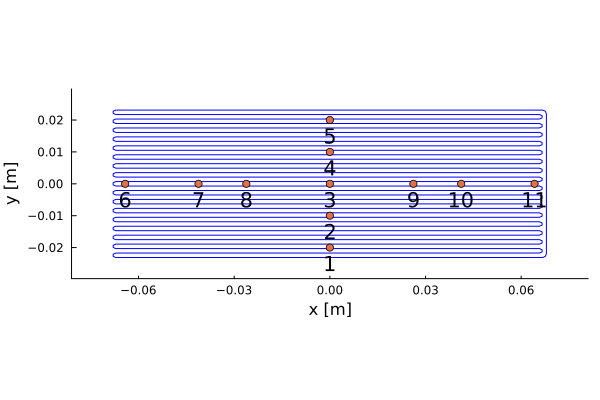

In [11]:
plot(OHP(),SimuResult)
scatter!(x2Dsensors[RTD_for_plotting],y2Dsensors[RTD_for_plotting])
annotate!(x2Dsensors[RTD_for_plotting], y2Dsensors[RTD_for_plotting].-0.005, RTD_for_plotting)

plot temperature curve

In [12]:
T_offset = 18.

18.0

In [13]:
power = SimuResult.integrator_tube.p.wall.power

40.0

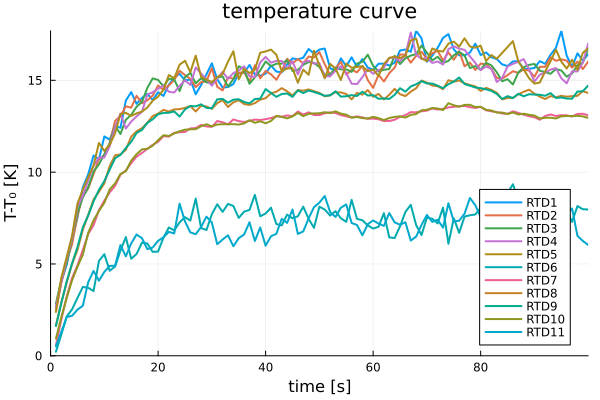

In [14]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

In [15]:
using Statistics

In [16]:
mean(g_hist[end-50:end,11].- 273.15)

25.561041750545108

  ### 2D interpolated thermal conductance

In [17]:
ihot = 3 # hot sensor  for calculating thermal conductance
icold = 11 # cold sensor  for calculating thermal conductance;

11

plot them separately

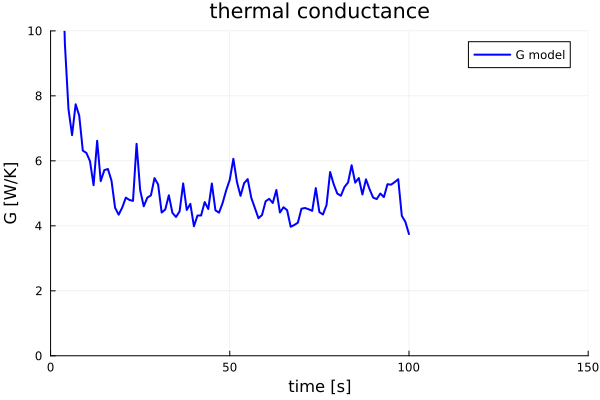

In [18]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(0,150),ylim=(0,10))

  # Plot 2D graphs

  ### film and slug dynamics

In [19]:
plot(OHPSlug(),130,SimuResult, aspectratio=1)

LoadError: BoundsError: attempt to access 100-element Vector{Any} at index [130]

In [20]:
@gif for i in eachindex(t)
    plot(OHPSuper(),i,SimuResult)
end

LoadError: type SimulationResult has no field grid

In [21]:
@gif for i in 1:150
plot(OHPSlug(),i,SimuResult, aspectratio=1)
end

LoadError: BoundsError: attempt to access 100-element Vector{Any} at index [101]

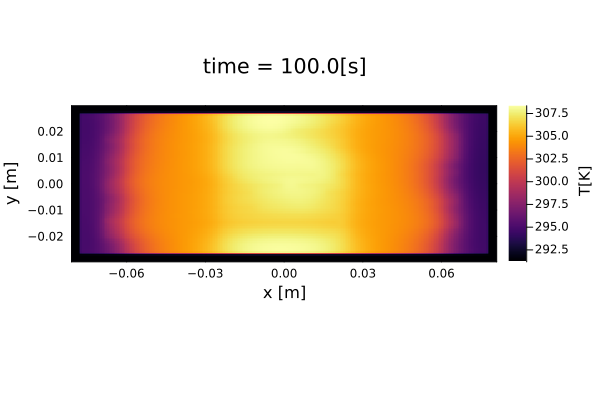

In [22]:
plot(OHPTemp(),100,SimuResult, aspectratio=1)
# savefig("Tfield_H02.pdf")

In [23]:
using Statistics

In [24]:
power = SimuResult.integrator_tube.p.wall.power

40.0

In [25]:
sys_hist = getcurrentsys.(SimuResult.tube_hist_u,[SimuResult.integrator_tube_resume.p]);

In [26]:
313-273.15

39.85000000000002

In [27]:
sys_hist[end].propconvert.PtoT.((sys_hist[end-10].vapor.P))

18-element Vector{Float64}:
 303.97413180415646
 303.9112327205677
 304.0730196153096
 304.0927853353029
 304.2669650552506
 304.3251305892444
 304.4202994812751
 304.50636026034726
 304.5539121896382
 304.5674958832516
 304.56212556407104
 304.4723387333513
 304.36135550716267
 304.30551139743045
 304.2925286364026
 304.2574270491829
 304.10250142915055
 304.02410332164436

In [28]:
# power = SimuResult.integrator_tube.p.wall.power
istart = 200
iend = 300
cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
mean(cond[istart:iend])

LoadError: BoundsError: attempt to access 100-element Vector{Float64} at index [200:300]

## get a map of conductance

In [29]:
# # angle_list = ["00" "30" "60" "90"]
# # power_list = ["80"]

# angle_list = ["00" "30" "60" "90"]
# power_list = ["50" "60" "70" "80"]

# file_dict = Dict("50"=>["zach033","zach040","zach041","zach042","zach043","zach044","zach045","zach046"], 
#                  "60"=>["zach034","zach048","zach049","zach050","zach051","zach052","zach053","zach054"], 
#                  "70"=>["zach035","zach056","zach057","zach058","zach059","zach060","zach061","zach062"], 
#                  "80"=>["zach036","zach064","zach065","zach066","zach067","zach068","zach069","zach070"])


In [30]:
angle_list = ["00" "30" "60" "90"]
power_list = ["50" "60" "70" "80"]

file_dict = ["zach160"]


1-element Vector{String}:
 "zach160"

In [31]:
isfile("/Users/yuxuanli/Documents/Hoffman/zach110/numedata/Zach_300s_90D.jld2")

false

## error bar result

In [32]:
condmap = zeros(length(power_list),length(angle_list))
condavg = zeros(length(power_list),length(angle_list))
condmax = zeros(length(power_list),length(angle_list))
condmin = zeros(length(power_list),length(angle_list))
for ipower in eachindex(power_list)
    for iangle in eachindex(angle_list)

        cond_individual = []
        for ifile in eachindex(file_dict)

        read_path = "/Users/yuxuanli/Documents/Hoffman/"*file_dict[ifile]*"/numedata/H02_C15_D"*angle_list[iangle]*"_P"*power_list[ipower]*".jld2"

        if isfile(read_path)
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            # istart = 200
            # iend = 300
            istart = 100
            iend = 150
            cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            push!(cond_individual,mean(cond[istart:iend]))
        end
        end
        if !isempty(cond_individual)
            println(cond_individual)
            condavg[ipower,iangle] = mean(cond_individual)
            condmax[ipower,iangle] = maximum(cond_individual)
            condmin[ipower,iangle] = minimum(cond_individual)
        end
        
    end  
end

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

In [33]:
# condmap = zeros(length(power_list),length(angle_list))
# condavg = zeros(length(power_list),length(angle_list))
# condmax = zeros(length(power_list),length(angle_list))
# condmin = zeros(length(power_list),length(angle_list))
# for ipower in eachindex(power_list)
#     for iangle in eachindex(angle_list)

#         cond_individual = []
#         for ifile in eachindex(file_dict[power_list[ipower]])

#         read_path = "/Users/yuxuanli/Documents/Hoffman/"*file_dict[power_list[ipower]][ifile]*"/numedata/Zach_300s_"*angle_list[iangle]*"D.jld2"

#         if isfile(read_path)
            
#             SimuResult = load(read_path)["SimulationResult"];
    
#             t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
#             power = SimuResult.integrator_tube.p.wall.power
#             istart = 200
#             iend = 300
#             cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
#             push!(cond_individual,mean(cond[istart:iend]))
#         end
#         end
#         if !isempty(cond_individual)
#             println(cond_individual)
#             condavg[ipower,iangle] = mean(cond_individual)
#             condmax[ipower,iangle] = maximum(cond_individual)
#             condmin[ipower,iangle] = minimum(cond_individual)
#         end
        
#     end  
# end

In [34]:
condmax

4×4 Matrix{Float64}:
 0.416599  0.971155  1.71614  2.28212
 0.429     0.950415  1.40361  1.95587
 0.0       1.07605   1.12839  1.29306
 0.0       1.00523   1.23867  1.6129

In [35]:
condmin

4×4 Matrix{Float64}:
 0.416599  0.971155  1.71614  2.28212
 0.429     0.950415  1.40361  1.95587
 0.0       1.07605   1.12839  1.29306
 0.0       1.00523   1.23867  1.6129

In [36]:
x = 50:10:80
y = 0:30:90

0:30:90

In [37]:
condmap

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [38]:
condmap_ref=[2.907 3.411 3.807 4.005;
-1.0 3.259 3.760 3.935;
-1.0 2.953 3.609 3.843;
-1.0 -1.0 3.349 3.647]

4×4 Matrix{Float64}:
  2.907   3.411  3.807  4.005
 -1.0     3.259  3.76   3.935
 -1.0     2.953  3.609  3.843
 -1.0    -1.0    3.349  3.647

In [39]:
read_path="/Users/yuxuanli/Documents/Hoffman/zach111/numedata/Zach_300s_30D.jld2"
            
            SimuResult = load(read_path)["SimulationResult"];
    
            t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
            power = SimuResult.integrator_tube.p.wall.power
            # istart = 200
            # iend = 300
            # cond = power ./ (g_hist[:,ihot] - g_hist[:,icold])
            # condmap[ipower,iangle] = (mean(cond[istart:iend]))
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))

LoadError: ArgumentError: No file exists at given path: /Users/yuxuanli/Documents/Hoffman/zach111/numedata/Zach_300s_30D.jld2

In [40]:
power

80.0

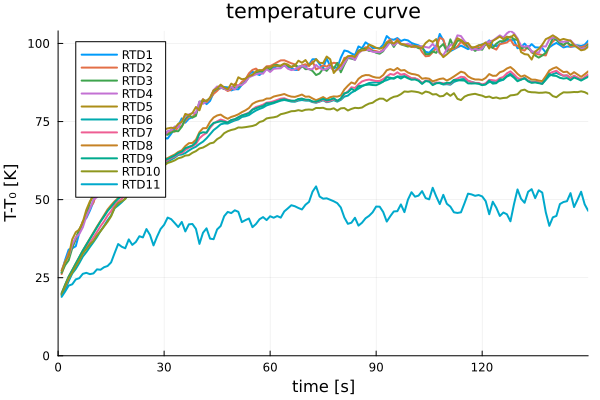

In [41]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

In [42]:
condmap

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [43]:
# scatter(y,condmap[1,:],label="numerical 50W (2min30s)",ylim=(0,4.2))
# scatter!(y,condmap_ref[1,:],label="exp 50W (30mins)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")

In [44]:
# scatter(y,condmap[2,:],label="numerical 60W",ylim=(0,4))
# scatter!(y,condmap_ref[2,:],label="exp 60W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [45]:
# scatter(y,condmap[3,:],label="numerical 70W",ylim=(0,4))
# scatter!(y,condmap_ref[3,:],label="exp 70W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [46]:
# scatter(y,condmap[4,:],label="numerical 80W",ylim=(0,4))
# scatter!(y,condmap_ref[4,:],label="exp 80W",xlabel="inclination angle",ylabel="thermal conductance [W/K]")

In [47]:
# scatter(x,condmap[:,4],label="numerical vertical OHP",ylim=(0,4.2))
# scatter!(x,condmap_ref[:,4],label="exp vertical OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

In [48]:
# scatter(x,condmap[:,3],label="numerical 60 degree OHP",ylim=(0,4.2))
# scatter!(x,condmap_ref[:,3],label="exp 60 degree OHP",xlabel="power [W]",ylabel="thermal conductance")

# new results with error bar

In [49]:
condavg[1,1]=0.0
condavg[2,1]=0.0
condavg

4×4 Matrix{Float64}:
 0.0  0.971155  1.71614  2.28212
 0.0  0.950415  1.40361  1.95587
 0.0  1.07605   1.12839  1.29306
 0.0  1.00523   1.23867  1.6129

In [50]:
condmap_ref

4×4 Matrix{Float64}:
  2.907   3.411  3.807  4.005
 -1.0     3.259  3.76   3.935
 -1.0     2.953  3.609  3.843
 -1.0    -1.0    3.349  3.647

In [51]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

# scatter(y[2:end],condavg[1,2:end],label="numerical 50W (2min30s)",yerror=(cond_err_min[1,:],cond_err_max[1,:]),ylim=(0.0,4.2))
scatter(y[2:end],condavg[1,2:end],label="numerical 50W (2 min 30 s)",ylim=(0.0,4.2))
scatter!(y,condmap_ref[1,:],label="exp 50W (30 min)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")
scatter!([0.0],[0.2],markercolor=:blue,markershape=:xcross,label="numerical dryout")
savefig("H02 50W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 50W avg.pdf"

In [52]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

# scatter(y,condavg[2,:],label="numerical 60W (2min30s)",yerror=(cond_err_min[2,:],cond_err_max[2,:]),ylim=(0.0,4.2))
scatter(y[2:end],condavg[2,2:end],label="numerical 60W (2 min 30 s)",ylim=(0.0,4.2))
scatter!(y,condmap_ref[2,:],label="exp 60W (30 min)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")
scatter!([0.0],[0.2],markercolor=:blue,markershape=:xcross,label="numerical dryout")
scatter!([0.0],[0.1],markercolor=:red,markershape=:xcross,label="exp dryout")
savefig("H02 60W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 60W avg.pdf"

In [53]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y[2:end],condavg[3,2:end],label="numerical 70W (2 min 30 s)",yerror=(cond_err_min[3,:],cond_err_max[3,:]),ylim=(0.0,4.2))
scatter!(y,condmap_ref[3,:],label="exp 70W (30 min)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")
scatter!([0.0],[0.2],markercolor=:blue,markershape=:xcross,label="numerical dryout")
scatter!([0.0],[0.1],markercolor=:red,markershape=:xcross,label="exp dryout")
savefig("H02 70W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 70W avg.pdf"

In [54]:

cond_err_min = condavg .- condmin
cond_err_max = condmax .- condavg

scatter(y[2:end],condavg[4,2:end],label="numerical 80W (2 min 30 s)",yerror=(cond_err_min[4,:],cond_err_max[4,:]),ylim=(0.0,4.2))
scatter!(y,condmap_ref[4,:],label="exp 80W (30 min)",xlabel="inclination angle",legend=:bottomright,ylabel="thermal conductance [W/K]")
scatter!([0.0],[0.2],markercolor=:blue,markershape=:xcross,label="numerical dryout")
scatter!([0.0,30.0],[0.1,0.1],markercolor=:red,markershape=:xcross,label="exp dryout")
savefig("H02 80W avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 80W avg.pdf"

In [83]:
scatter(x,condavg[:,4],label="numerical vertical OHP",yerror=(cond_err_min[:,4],cond_err_max[:,4]),ylim=(0.0,4.2))
scatter!(x,condmap_ref[:,4],label="exp vertical OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

savefig("H02 90D avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 90D avg.pdf"

In [84]:
scatter(x,condavg[:,3],label="numerical 60 degrees OHP",yerror=(cond_err_min[:,3],cond_err_max[:,3]),ylim=(0.2,4.2))
scatter!(x,condmap_ref[:,3],label="exp 60 degrees OHP",xlabel="power [W]",ylabel="thermal conductance [W/K]")

savefig("H02 60D avg.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/H02 60D avg.pdf"

In [439]:
@__FILE__

"In[439]"

## If I add a "fake" condenser on the adiabatic side, that percent thermal leakage it represents?

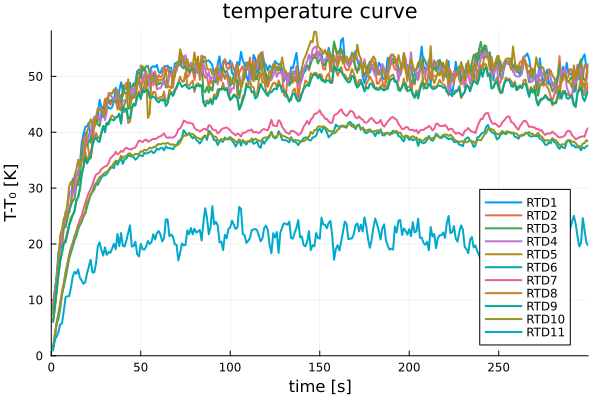

In [364]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist),SimuResult)

In [374]:
CondenserArea = 51e-3*15e-3;

In [383]:
CondenserTemp = mean(g_hist[:,11][200:300])
AdiabaticsideTemp = mean(g_hist[:,6][200:300])
Tref = 291.2
htc = 5000.0
htc_adiabatic = 350.

350.0

In [384]:
WattCondenser = CondenserArea*htc*(CondenserTemp-Tref)

83.33781975163171

In [385]:
WattAdiabatic = CondenserArea*htc_adiabatic*(AdiabaticsideTemp-Tref)

10.365358705912518

In [386]:
percentage = WattAdiabatic/(WattCondenser+WattAdiabatic)

0.11061907265620596

Very rough estimate of condenser htc if assuming completely adiabatic elsewhere

In [389]:
Power_increase = 10 # Watt
Plate_Temp_increase_under_Condenser = 2.9 #K
HTC_estimate = Power_increase/Plate_Temp_increase_under_Condenser/CondenserArea # W/m^2K

4507.55014649538

In [231]:
SimuResult.boil_hist

654-element Vector{Any}:
 [237.0, 1.009999999999954]
 [239.0, 1.009999999999954]
 [226.0, 1.9299999999998527]
 [237.0, 2.199999999999823]
 [191.0, 3.5399999999996754]
 [240.0, 3.969999999999628]
 [196.0, 4.40999999999958]
 [198.0, 4.449999999999576]
 [52.0, 4.4599999999995745]
 [3.0, 4.529999999999567]
 [2.0, 4.539999999999566]
 [57.0, 5.0599999999995084]
 [12.0, 5.519999999999458]
 ⋮
 [17.0, 98.30999999982424]
 [18.0, 98.35999999982413]
 [19.0, 98.39999999982403]
 [211.0, 98.55999999982366]
 [53.0, 99.06999999982247]
 [240.0, 99.31999999982189]
 [241.0, 99.33999999982184]
 [7.0, 99.46999999982154]
 [2.0, 99.57999999982128]
 [210.0, 99.89999999982054]
 [166.0, 99.92999999982047]
 [89.0, 99.98999999982033]

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*